<AxesSubplot:>

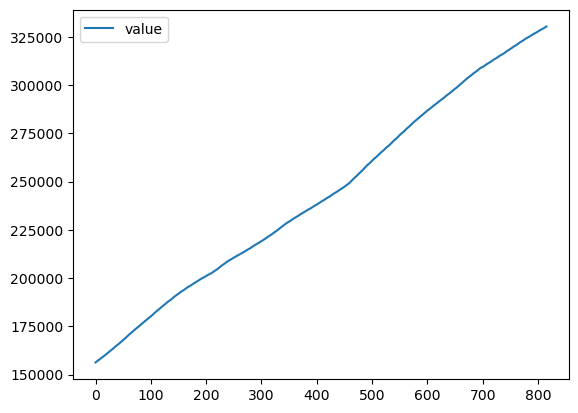

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

df = pd.read_csv('POP.csv', delimiter=',')
df.plot()

In [64]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [80]:
df['date'] = pd.to_datetime(df['date'])


In [81]:
np.random.seed(5)

In [82]:
dataset=np.array(df['value'])
dataset=dataset.reshape(-1,1)

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [84]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

546 270


In [85]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [86]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [87]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [88]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
544/544 - 2s - loss: 0.0343 - 2s/epoch - 3ms/step
Epoch 2/100
544/544 - 1s - loss: 0.0098 - 504ms/epoch - 927us/step
Epoch 3/100
544/544 - 1s - loss: 0.0028 - 505ms/epoch - 929us/step
Epoch 4/100
544/544 - 1s - loss: 2.5233e-04 - 519ms/epoch - 954us/step
Epoch 5/100
544/544 - 0s - loss: 2.4543e-05 - 488ms/epoch - 897us/step
Epoch 6/100
544/544 - 0s - loss: 1.9818e-05 - 491ms/epoch - 903us/step
Epoch 7/100
544/544 - 0s - loss: 1.7785e-05 - 495ms/epoch - 910us/step
Epoch 8/100
544/544 - 1s - loss: 1.5360e-05 - 584ms/epoch - 1ms/step
Epoch 9/100
544/544 - 1s - loss: 1.2603e-05 - 603ms/epoch - 1ms/step
Epoch 10/100
544/544 - 1s - loss: 1.0361e-05 - 507ms/epoch - 932us/step
Epoch 11/100
544/544 - 1s - loss: 8.1777e-06 - 509ms/epoch - 936us/step
Epoch 12/100
544/544 - 1s - loss: 6.5806e-06 - 506ms/epoch - 930us/step
Epoch 13/100
544/544 - 1s - loss: 5.9078e-06 - 512ms/epoch - 941us/step
Epoch 14/100
544/544 - 1s - loss: 5.7973e-06 - 501ms/epoch - 921us/step
Epoch 15/100
544/544 -

In [89]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

9/9 [==============================] - 0s 1ms/step
Train Score: 107.21 RMSE
Test Score: 1534.09 RMSE


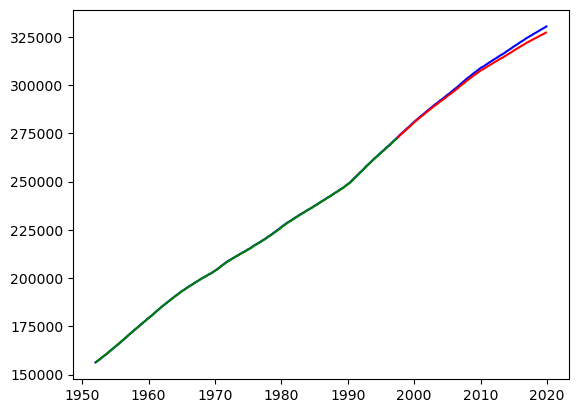

In [90]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(df['date'],scaler.inverse_transform(dataset),color='blue')
plt.plot(df['date'],trainPredictPlot,color='green')
plt.plot(df['date'],testPredictPlot,color='red')
plt.show()

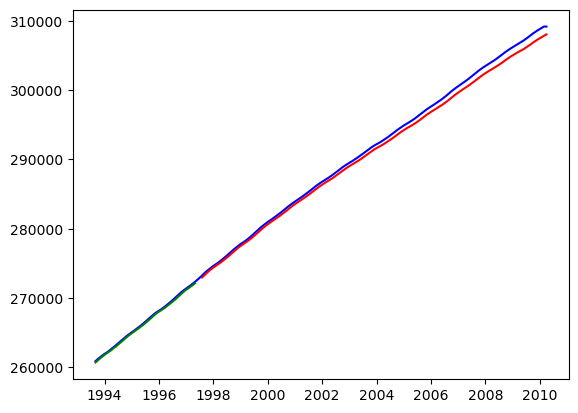

In [92]:
plt.plot(df['date'][500:700],(scaler.inverse_transform(dataset))[500:700],color='blue')
plt.plot(df['date'][500:700],trainPredictPlot[500:700],color='green')
plt.plot(df['date'][500:700],testPredictPlot[500:700],color='red')
plt.show()